In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import GRU
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time
import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
from sklearn.metrics import mean_squared_error

# read the dataset
prices_dataset =  pd.read_csv('prices.csv', header=0)

c:\users\smuminov\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
c:\users\smuminov\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def initialize(company,look_back,numday):
    data = prices_dataset[prices_dataset['symbol']==str(company)]
    stock_prices = data.close.values.astype('float32')
    stock_prices = stock_prices.reshape(len(stock_prices), 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_prices = scaler.fit_transform(stock_prices)
    train_size = int(len(stock_prices) * 0.80)
    test_size = len(stock_prices) - train_size
    train, test = stock_prices[0:train_size,:], stock_prices[train_size:len(stock_prices),:]

# split the data into test and train

    dataX, dataY = [], []
    for i in range(len(train)-look_back):
        a = train[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(train[i + look_back, 0])

    
    trainX = np.array(dataX)
    trainY = np.array(dataY)
    
    dataX, dataY = [], []
    for i in range(len(test)-look_back):
        a = test[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(test[i + look_back, 0])

    testX = np.array(dataX)
    testY = np.array(dataY)
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # initialize the model
    model = Sequential()

    model.add(LSTM(
        input_dim=look_back,
        output_dim=50,
        return_sequences=True))
    model.add(Dropout(0.1))

    model.add(LSTM(
        100,
        return_sequences=False))
    model.add(Dropout(0.1))

    model.add(Dense(
        output_dim=1))
    model.add(Activation('linear'))
    
    # compile the model
    start = time.time()
    model.compile(loss='mse', optimizer='rmsprop')
    print ('compilation time : ', time.time() - start)
    
    # Train the model
    model.fit(
    trainX,
    trainY,
    batch_size=120,
    nb_epoch=100,
    validation_split=0.05)
    
    # plot the results on test data
    plt.plot(scaler.inverse_transform(testY.reshape(-1, 1)))
    plt.plot(scaler.inverse_transform(np.array(model.predict(testX)).reshape(-1, 1)))
    plt.legend()
    plt.show()
    
    # call the predict funtion
    x = predict_n(numday,testX,model,look_back)
    x = scaler.inverse_transform(np.array(x).reshape(-1, 1))
    
    # print the predicted data
    for i in range(0,len(x)):
        print("The prediction for day "+str(i+1)+" is "+ str(x[i-1][0]))
    
    
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    # plot the forecasted data
    if (len(x)>=2):
        plt.plot(x)
        plt.legend()
        plt.show()

In [3]:
def initializeGRU(company,look_back,numday):
    data = prices_dataset[prices_dataset['symbol']==str(company)]
    stock_prices = data.close.values.astype('float32')
    stock_prices = stock_prices.reshape(len(stock_prices), 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_prices = scaler.fit_transform(stock_prices)
    train_size = int(len(stock_prices) * 0.80)
    test_size = len(stock_prices) - train_size
    train, test = stock_prices[0:train_size,:], stock_prices[train_size:len(stock_prices),:]

# split the data into test and train

    dataX, dataY = [], []
    for i in range(len(train)-look_back):
        a = train[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(train[i + look_back, 0])

    
    trainX = np.array(dataX)
    trainY = np.array(dataY)
    
    dataX, dataY = [], []
    for i in range(len(test)-look_back):
        a = test[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(test[i + look_back, 0])

    testX = np.array(dataX)
    testY = np.array(dataY)
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # initialize the model
    model = Sequential()

    model.add(GRU(
        input_dim=look_back,
        output_dim=50,
        return_sequences=True))
    model.add(Dropout(0.1))

    model.add(GRU(
        100,
        return_sequences=False))
    model.add(Dropout(0.1))

    model.add(Dense(
        output_dim=1))
    model.add(Activation('linear'))

    start = time.time()
    model.compile(loss='mse', optimizer='rmsprop')
    print ('compilation time : ', time.time() - start)
    
    # train the model
    model.fit(
    trainX,
    trainY,
    batch_size=120,
    nb_epoch=100,
    validation_split=0.05)
    
    # plot the results on test data
    plt.plot(scaler.inverse_transform(testY.reshape(-1, 1)))
    plt.plot(scaler.inverse_transform(np.array(model.predict(testX)).reshape(-1, 1)))
    plt.legend()
    plt.show()
    
    # call the predict function
    x = predict_n(numday,testX,model,look_back)
    x = scaler.inverse_transform(np.array(x).reshape(-1, 1))
    
    # print the predicted data
    for i in range(0,len(x)):
        print("The prediction for day "+str(i+1)+" is "+ str(x[i-1][0]))
    
    
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    # plot the forecasted data
    if (len(x)>=2):
        plt.plot(x)
        plt.legend()
        plt.show()

In [4]:



# predicts stock price for nth day
def predict_n(number, testX, model,look_back):
    predicted = []
    arr = np.reshape(testX[len(testX)-1], (testX[len(testX)-1].shape[0], 1, testX[len(testX)-1].shape[1]))
    for i in range(int(number)):
        curr = model.predict(arr)
        for j in range(look_back-1):
            arr[0][0][j] = arr[0][0][j+1]
        arr[0][0][look_back-1] = curr
        predicted.append(curr)
    return predicted

In [5]:
def crowd_sentiment(company):
    stocktwits_data =  pd.read_csv('StockTwits_SPY.csv', header=0)
    senti = stocktwits_data.sentiment.values.astype('str')
    pos = 0
    neg = 0
    for i in senti:
        if i == 'bearish':
            neg += 1
        elif i == 'bullish':
            pos += 1
            
        if pos > neg:
            return "BULLISH"
        elif pos < neg:
            return "BEARISH"
        else:
            return "NEUTRAL"


In [6]:
import watson_developer_cloud

# Set up Assistant service.
service = watson_developer_cloud.AssistantV1(
  username = '9dcd5dac-d49b-42b0-85d6-4e5c0784ffd1', # replace with service username
  password = 'k4MH5tw21Qa1', # replace with service password
  version = '2018-02-16'
)
workspace_id = 'ef22da03-446b-45bc-a91d-2e39fb835dd9' # replace with workspace ID


Hi. Welcome to stock value predictor. What would you like to do?
>> Predict Stock
How many days you want to see the forecast?
>> 5
Which method would you like to use (LSTM, GRU)?
>> LSTM
Which stocks forecast would you like to see? Please enter ticker number
>> MSFT


c:\users\smuminov\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
c:\users\smuminov\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(None, 2), return_sequences=True, units=50)`
c:\users\smuminov\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
c:\users\smuminov\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


compilation time :  0.013009309768676758
Train on 1336 samples, validate on 71 samples
Epoch 1/100
1336/1336 [==============================] - 1s 857us/step - loss: 0.0546 - val_loss: 0.1535
Epoch 2/100
1336/1336 [==============================] - 0s 55us/step - loss: 0.0211 - val_loss: 0.0593
Epoch 3/100
1336/1336 [==============================] - 0s 54us/step - loss: 0.0119 - val_loss: 0.0270
Epoch 4/100
1336/1336 [==============================] - 0s 55us/step - loss: 0.0071 - val_loss: 0.0149
Epoch 5/100
1336/1336 [==============================] - 0s 53us/step - loss: 0.0028 - val_loss: 0.0046
Epoch 6/100
1336/1336 [==============================] - 0s 61us/step - loss: 8.6510e-04 - val_loss: 4.2244e-04
Epoch 7/100
1336/1336 [==============================] - 0s 52us/step - loss: 5.4045e-04 - val_loss: 0.0019
Epoch 8/100
1336/1336 [==============================] - 0s 50us/step - loss: 5.7778e-04 - val_loss: 3.6429e-04
Epoch 9/100
1336/1336 [==============================] - 0s 

1336/1336 [==============================] - 0s 52us/step - loss: 4.0782e-04 - val_loss: 3.6408e-04
Epoch 74/100
1336/1336 [==============================] - 0s 56us/step - loss: 3.9982e-04 - val_loss: 8.0440e-04
Epoch 75/100
1336/1336 [==============================] - 0s 55us/step - loss: 4.0329e-04 - val_loss: 5.8060e-04
Epoch 76/100
1336/1336 [==============================] - 0s 52us/step - loss: 4.5338e-04 - val_loss: 5.2435e-04
Epoch 77/100
1336/1336 [==============================] - 0s 55us/step - loss: 3.8578e-04 - val_loss: 3.4913e-04
Epoch 78/100
1336/1336 [==============================] - 0s 52us/step - loss: 3.7614e-04 - val_loss: 8.4454e-04
Epoch 79/100
1336/1336 [==============================] - 0s 51us/step - loss: 3.7650e-04 - val_loss: 3.7910e-04
Epoch 80/100
1336/1336 [==============================] - 0s 50us/step - loss: 4.0890e-04 - val_loss: 2.1427e-04
Epoch 81/100
1336/1336 [==============================] - 0s 54us/step - loss: 3.7765e-04 - val_loss: 2.1388e

No handles with labels found to put in legend.


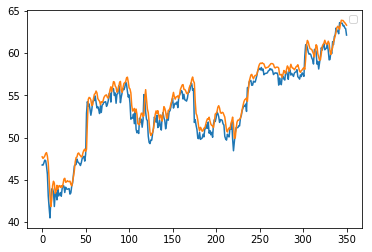

No handles with labels found to put in legend.


The prediction for day 1 is 64.19177
The prediction for day 2 is 63.3128
The prediction for day 3 is 63.5045
The prediction for day 4 is 63.76444
The prediction for day 5 is 63.978073
Train Score: 0.81 RMSE
Test Score: 1.14 RMSE


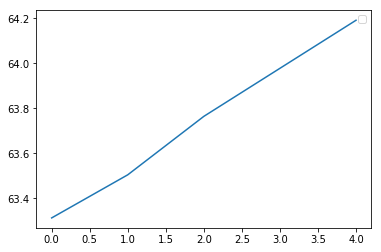

AttributeError: 'DataFrame' object has no attribute 'sentiment'

In [8]:
# Initialize with empty value to start the conversation.
user_input = ''
context = {}
current_action = ''
days = 1
methodu="LSTM"

# Main input/output loop
while current_action != 'end_conversation':

  # Send message to Assistant service.
  response = service.message(
    workspace_id = workspace_id,
    input = {
      'text': user_input
    },
    context = context
  )
    
  if response['intents']:
    if response['intents']==[{'intent': 'number', 'confidence': 1}]:
        days=user_input
        
  if(response['intents']==[{'confidence': 1, 'intent': 'methodused'}]):
    if(user_input=="LSTM"):
        methodu="LSTM"
    else:
        methodu="GRU"
    
        
  if response['intents']:
    if response['intents']==[{'confidence': 1, 'intent': 'stocks'}]:

        if(methodu=="LSTM"):
            initialize(user_input,2,days)
        else:
            initializeGRU(user_input,2,days)
        
        #sentiment from stock twits
        if(user_input=="MSFT"):
            sentiment = crowd_sentiment("SPY")
            print("Overall sentiment for stock is " + sentiment)
        
  # Print the output from dialog, if any.
  if response['output']['text']:
    print(response['output']['text'][0])
    
  # Update the stored context with the latest received from the dialog.
  context = response['context']
  # Check for action flags sent by the dialog.
  
    
  if 'action' in response['output']:
    current_action = response['output']['action']

  # If we're not done, prompt for next round of input.
  if current_action != 'end_conversation':
    user_input = input('>> ')